COMP 215 - LAB 1
----------------
#### Name: Kitty
#### Date: 9 January 2023

This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

We'll also review some basic data types (like `int` and `str`) and data structures (like `list` and `dict`)

**New Python Concepts**:
  * `datetime.date` objects represent a calendar date (these are very powerful)
  * *list comprehension* provides a compact way to represent map and filter algorithms

As will be usual, the fist code cell, below, simply imports all the modules we'll be using...

In [17]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

### API Query

Now, let's fetch some Covid-19 daily case-count data from the Open Covid API:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=2022-11-01`  # since the 1st of november (note date format:  yyyy-mm-dd)

In [26]:

location = 'loc=593'
dates_of_data = 'after=2021-09-01'
query = 'https://api.opencovid.ca/timeseries?stat=cases&geo=hr&'+location+'&'+dates_of_data
response = requests.request("GET", query, headers={}, data={})
print('Response data type:', type(response.text))
print(response.text)

Response data type: <class 'str'>
{"data":{"cases":[{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-01","value":38740,"value_daily":134},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-02","value":38834,"value_daily":94},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-03","value":38932,"value_daily":98},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-04","value":39034,"value_daily":102},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-05","value":39111,"value_daily":77},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-06","value":39198,"value_daily":87},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-07","value":39302,"value_daily":104},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-08","value":39433,"value_daily":131},{"name":"cases","region":"BC","sub_region_1":"593","date":"2021-09-09","value":39557,"value_daily":124},{"name":"cases",

Notice that the response looks like a dictionary, but is actually just a string of text (most data is exchanged on the web as plain text!).  This particular data format is called "[JSON](https://en.wikipedia.org/wiki/JSON)" 

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [27]:
result = json.loads(response.text)
pprint(result)   # pretty-print the entire data structure we got back...

{'data': {'cases': [{'date': '2021-09-01',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 38740,
                     'value_daily': 134},
                    {'date': '2021-09-02',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 38834,
                     'value_daily': 94},
                    {'date': '2021-09-03',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 38932,
                     'value_daily': 98},
                    {'date': '2021-09-04',
                     'name': 'cases',
                     'region': 'BC',
                     'sub_region_1': '593',
                     'value': 39034,
                     'value_daily': 102},
                    {'date': '2021-09-

### Extract data items from a list of dictionaries
Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we "parse" the date strings, using strptime, into a real date objects so they are easier to work with (format: yyyy-mm-dd)

In [28]:
cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]     # List Comprehension #1: extract the case date strings
n_cases = [daily['value_daily'] for daily in cases] # List Comprehension #2:  extract the case counts

print('Dates:', case_dates[:10])      # do you recall the "slice" operation?  If not, look it up in the ThinkCsPy textbook!
print('Cases:', n_cases[:10])
print('Zipped:', list(zip(case_dates[:10], n_cases[:10])))  # zip is a very handy function to "zip" 2 lists together like a zipper...

Dates: ['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10']
Cases: [134, 94, 98, 102, 77, 87, 104, 131, 124, 141]
Zipped: [('2021-09-01', 134), ('2021-09-02', 94), ('2021-09-03', 98), ('2021-09-04', 102), ('2021-09-05', 77), ('2021-09-06', 87), ('2021-09-07', 104), ('2021-09-08', 131), ('2021-09-09', 124), ('2021-09-10', 141)]


### Datetime.date
Working with date strings is a pain.  So many formats!  Even within Canada, you might see:
"Jan. 9, 2023" or "09-01-2023" or "2023-01-09" or ....
Imagine trying to do a calculation like "how many days between these 2 dates"!!
The build-in `datetime` package makes working with dates much easier.
  * step 1: "parse" the date string data (`strptime` ==  "string-parse-datetime object")
  * step 2: get the date part (i.e., without the time)

In [29]:
# parse a datetime object from a string by supplying the correct "format" string.
datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]  # List Comprehension #3

# but we only need the "date" part...
dates = [dt.date() for dt in datetime_objects]
print(dates[:10])

[datetime.date(2021, 9, 1), datetime.date(2021, 9, 2), datetime.date(2021, 9, 3), datetime.date(2021, 9, 4), datetime.date(2021, 9, 5), datetime.date(2021, 9, 6), datetime.date(2021, 9, 7), datetime.date(2021, 9, 8), datetime.date(2021, 9, 9), datetime.date(2021, 9, 10)]


## Exercise 1

In the code cell below, re-write each of the 3 "List Comprehensions" in the code cells above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumulator" algorithm (and more efficient too!)

In [30]:
dates_list = []
case_counts_list = []
nice_dates = []
better_dates = []
#iterating through list of dictionaries and extracting dates and daily case counts
for dictionary in result['data']['cases']:
  dates_list.append(dictionary['date'])
  case_counts_list.append(dictionary['value_daily'])

for dates in dates_list:
  nice_dates.append(datetime.datetime.strptime(dates,'%Y-%m-%d'))

for dates in nice_dates:
  better_dates.append(dates.date())
#dates = [dt.date() for dt in datetime_objects]
print(dates_list)
print(case_counts_list)
print(nice_dates[:10])
print(better_dates[:10])


['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12', '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10', '2021

### Generating a plot

Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html

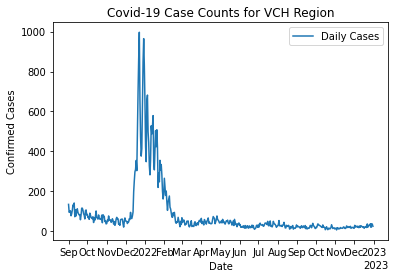

In [31]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(nice_dates, case_counts_list, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Confirmed Cases')  # Add a y-label to the axes.
ax.set_title("Covid-19 Case Counts for VCH Region")  # Add a title to the axes.
ax.legend();

## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

 * Try to modify as little code as you can (just need to change the "query"), and re-run the analysis
 * You can get the ***hruid*** location code for each health region here:  https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv
 * Can you generalize the code in the 2nd code cell to make it easier to repeat the analysis for different locations?  What about for different dates?

## OPTIONAL - Take your skills to the next level...

## Exercise 3

Notice that the data plot looks quite erratic.  These swings most likely represent artifacts attributable to the reporting process rather than actual changes in infection rates.

 * One way to fix this is is to "smooth" the date with a "7-day rolling average".
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plot with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices